# Step 1: Load the Data

In [6]:
from google.colab import files
uploaded = files.upload()

Saving zillow_data.csv to zillow_data.csv


In [ ]:
import io

# Dataset is now stored in a Pandas Dataframe

In [7]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['zillow_data.csv']))
# df = pd.read_csv('data/zillow_data.csv')

In [9]:
df.shape

(14723, 272)

# Step 2: Data Preprocessing

In [10]:
melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])

In [11]:
melted

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
3901591,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
3901592,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0
3901593,81225,93733,14722,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0


In [12]:
melted = melted.rename(columns={'RegionName': 'ZipCode'})
melted = melted.drop('RegionID', axis=1)
melted.set_index('time', inplace=True)
melted['ZipCode'] = melted['ZipCode'].map("{:05}".format)

In [13]:
melted

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,77300.0
...,...,...,...,...,...,...,...
2018-04-01,01338,14719,Ashfield,MA,Greenfield Town,Franklin,209300.0
2018-04-01,03293,14720,Woodstock,NH,Claremont,Grafton,225800.0
2018-04-01,40404,14721,Berea,KY,Richmond,Madison,133400.0


# Step 3: EDA and Visualization

In [14]:
df['five_year'] = ((df['2018-04'] - df['2013-04']) / df['2013-04']) * 100
df['ten_year'] = ((df['2018-04'] - df['2008-04']) / df['2008-04']) * 100
df['fifteen_year'] = ((df['2018-04'] - df['2003-04']) / df['2003-04']) * 100

In [15]:
df.sort_values(by='five_year', ascending=False).head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year,ten_year,fifteen_year
7302,93292,80216,Denver,CO,Denver,Denver,7303,NaN,NaN,NaN,...,247600,249100,251200,253800,258100,263700,267300,173.872951,NaN,NaN
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,521100,526700,535800,546900,555000,562000,566700,167.943262,45.158811,100.815025
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,68700,69700,71000,72300,73500,75300,76800,161.224490,-22.891566,-33.621435
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,346700,351200,357100,362500,366900,371600,376100,159.379310,23.676422,39.658374
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,162500,165300,167100,168200,171100,175100,177300,159.210526,24.421053,89.828694
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,211100,214500,217200,219300,221500,224300,226500,155.932203,116.746411,178.940887
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,200400,202600,206000,209600,211600,213300,215600,153.647059,12.291667,75.856444
6563,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564,34400.0,34600.0,34700.0,...,167600,169000,170400,171400,173900,179700,185200,147.593583,166.474820,313.392857
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1567700,1559700,1545700,1540200,1553600,1578400,1598700,147.591761,122.226856,446.190639
1835,74238,37207,Nashville,TN,Nashville,Davidson,1836,63600.0,63600.0,63600.0,...,186700,188000,189500,191400,193900,197600,200800,146.683047,93.635487,137.633136


In [16]:
df_94590 = melted[melted['ZipCode'] == '94590']
df_94590

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,94590,1240,Vallejo,CA,Vallejo,Solano,108200.0
1996-05-01,94590,1240,Vallejo,CA,Vallejo,Solano,107800.0
1996-06-01,94590,1240,Vallejo,CA,Vallejo,Solano,107500.0
1996-07-01,94590,1240,Vallejo,CA,Vallejo,Solano,107300.0
1996-08-01,94590,1240,Vallejo,CA,Vallejo,Solano,107100.0
...,...,...,...,...,...,...,...
2017-12-01,94590,1240,Vallejo,CA,Vallejo,Solano,357100.0
2018-01-01,94590,1240,Vallejo,CA,Vallejo,Solano,362500.0
2018-02-01,94590,1240,Vallejo,CA,Vallejo,Solano,366900.0


In [17]:
df_94590 = df_94590['value']
df_94590

time
1996-04-01    108200.0
1996-05-01    107800.0
1996-06-01    107500.0
1996-07-01    107300.0
1996-08-01    107100.0
                ...   
2017-12-01    357100.0
2018-01-01    362500.0
2018-02-01    366900.0
2018-03-01    371600.0
2018-04-01    376100.0
Name: value, Length: 265, dtype: float64

In [18]:
# find the index which allows us to split off 20% of the data
# cutoff = '2017-04-01' #cut off point at 80% of the data
# cutoff

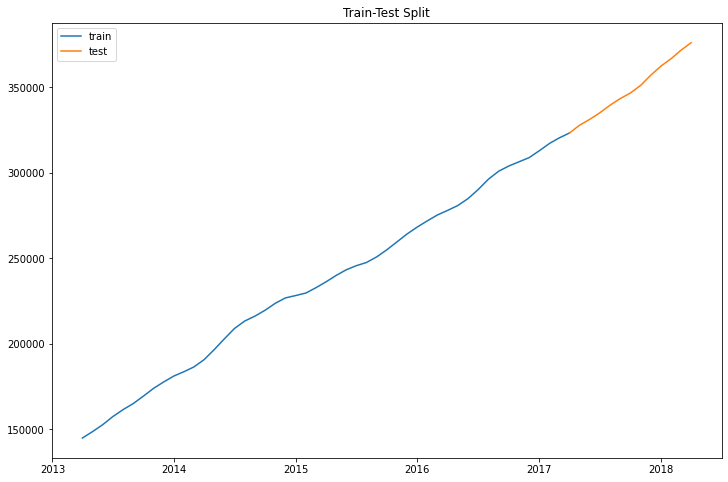

In [19]:
from matplotlib import pyplot as plt

# Define train and test sets according to the index found above
train = df_94590['2013-04-01':'2017-04-01'] #before cut off is train set -- 80%

test = df_94590['2017-04-01':] #after cut off is the test set --20%

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [20]:
# Data Library
import numpy as np

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


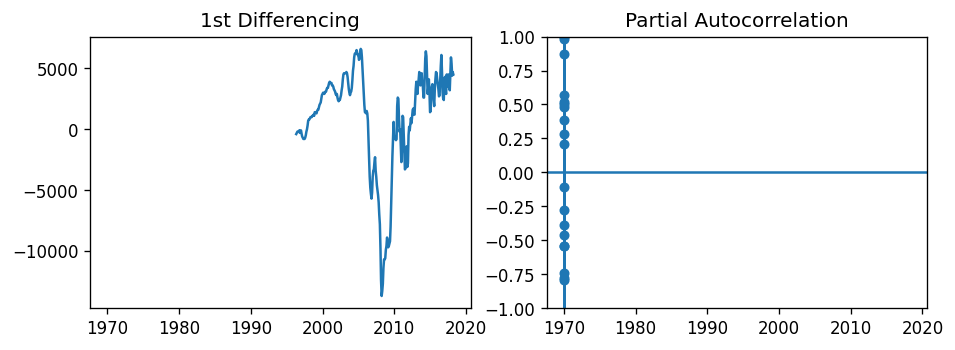

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_94590.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
plot_pacf(df_94590.diff().dropna(), ax=axes[1])

plt.show();

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Build Model
model_0 = ARIMA(train, order=(1, 0, 2)).fit()
model_1 = ARIMA(train, order=(1, 1, 2)).fit()
model_2 = ARIMA(train, order=(1, 2, 2)).fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

In [23]:
y_pred_0 = model_0.predict(start = test.index[0], end = test.index[-1])
y_pred_1 = model_1.predict(start = test.index[0], end = test.index[-1])
y_pred_2 = model_2.predict(start = test.index[0], end = test.index[-1])

In [24]:
y_pred_2

2017-04-01    323502.768565
2017-05-01    326212.021310
2017-06-01    329127.558171
2017-07-01    332043.601302
2017-08-01    334959.717341
2017-09-01    337875.843879
2017-10-01    340791.971930
2017-11-01    343708.100198
2017-12-01    346624.228497
2018-01-01    349540.356801
2018-02-01    352456.485105
2018-03-01    355372.613410
2018-04-01    358288.741714
Freq: MS, Name: predicted_mean, dtype: float64

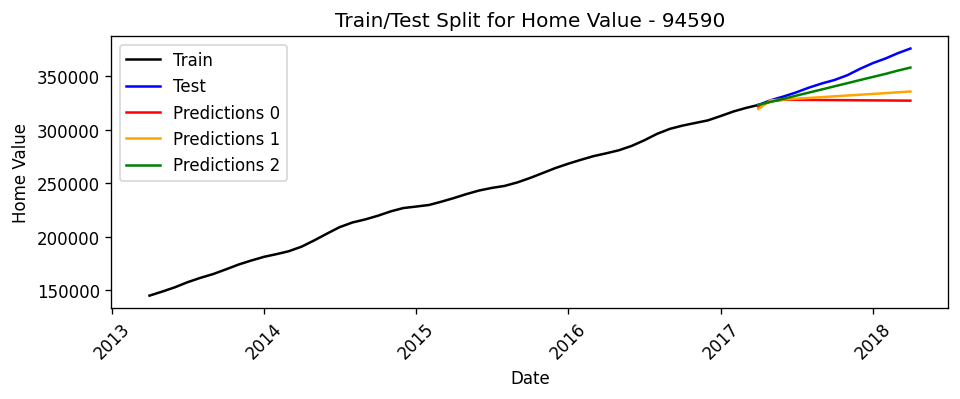

In [25]:
# Plot
plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "blue",label='Test')
plt.ylabel('Home Value')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split for Home Value - 94590")
plt.plot(y_pred_0, color='red', label = 'Predictions 0')
plt.plot(y_pred_1, color='orange', label = 'Predictions 1')
plt.plot(y_pred_2, color='green', label = 'Predictions 2')
plt.legend();

In [26]:
# !pip install pmdarima

In [27]:
# ARIMA library
import pmdarima as pm

In [39]:
df_94590_diff = df_94590.diff().dropna()
df_94590_2diff = df_94590.diff().diff().dropna()

In [40]:
# Define train and test sets according to the index found above
train = df_94590['2010-04-01':'2016-04-01'] #before cut off is train set -- 75%
train_diff = df_94590_diff['2010-04-01':'2016-04-01']
train_2diff = df_94590_2diff['2010-04-01':'2016-04-01']

test = df_94590['2016-04-01':] #after cut off is the test set --25%
test_diff = df_94590_diff['2016-04-01':]
test_2diff = df_94590_2diff['2016-04-01':]

In [54]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1190.185, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1188.088, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1185.187, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1185.003, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1186.256, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1186.027, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=1188.818, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1183.001, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1184.193, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1184.011, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1183.202, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.596 seconds
                               SARIMAX Results                                
Dep. Variable:

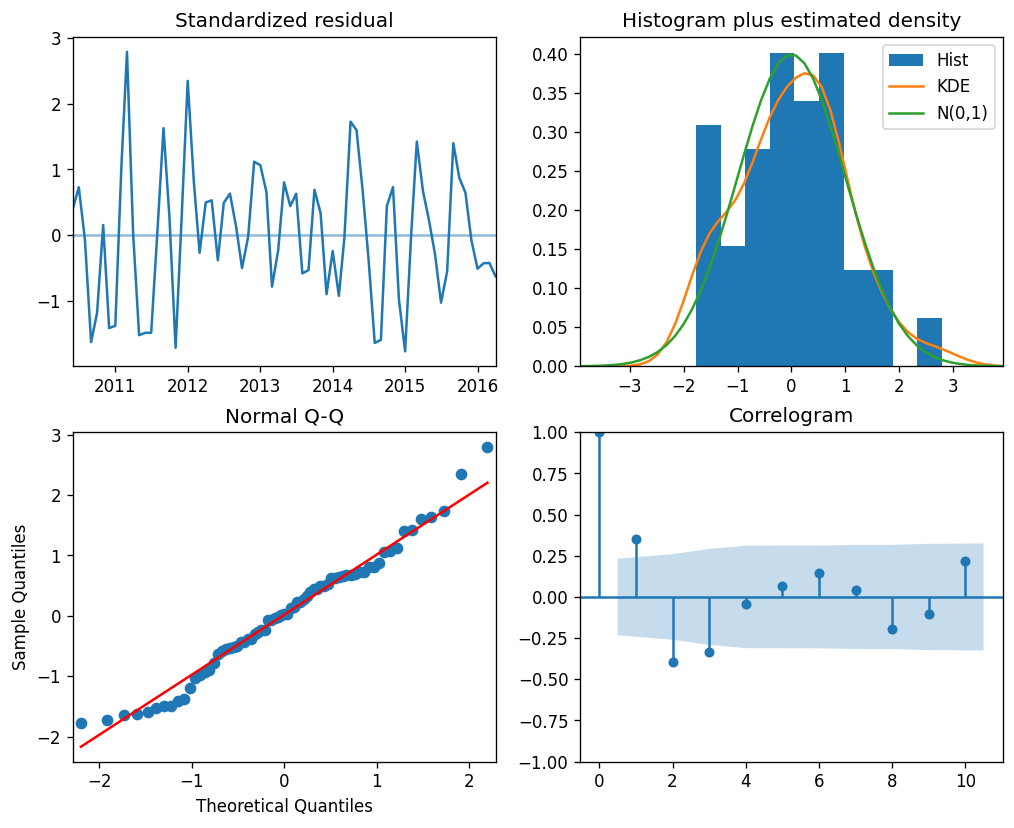

In [55]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

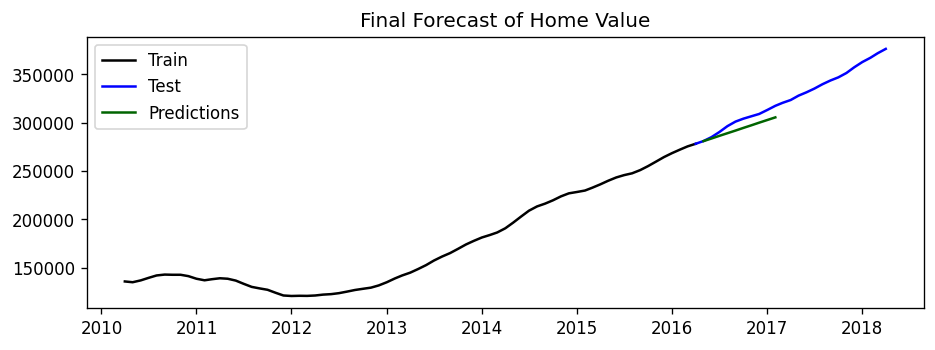

In [59]:
# Forecast
y_pred = model.predict(start = test.index[0], end = test.index[-1])

# Plot
plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "blue",label='Test')
plt.plot(y_pred, color='darkgreen',label='Predictions')

plt.title("Final Forecast of Home Value")
plt.legend()
plt.show()

In [62]:
test.index[-1]

Timestamp('2018-04-01 00:00:00')

In [44]:
model_diff = pm.auto_arima(train_diff, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1179.135, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1203.760, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1197.607, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1177.660, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1201.938, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1177.768, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1172.933, Time=0.85 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1171.112, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1172.505, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1173.027, Time=0.73 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1173.105, Time=0.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1172.584, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1172.637, Time=0.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1174.750, Time=1.66 sec
 ARIMA(2,1,2)(0,0,0)[0]          

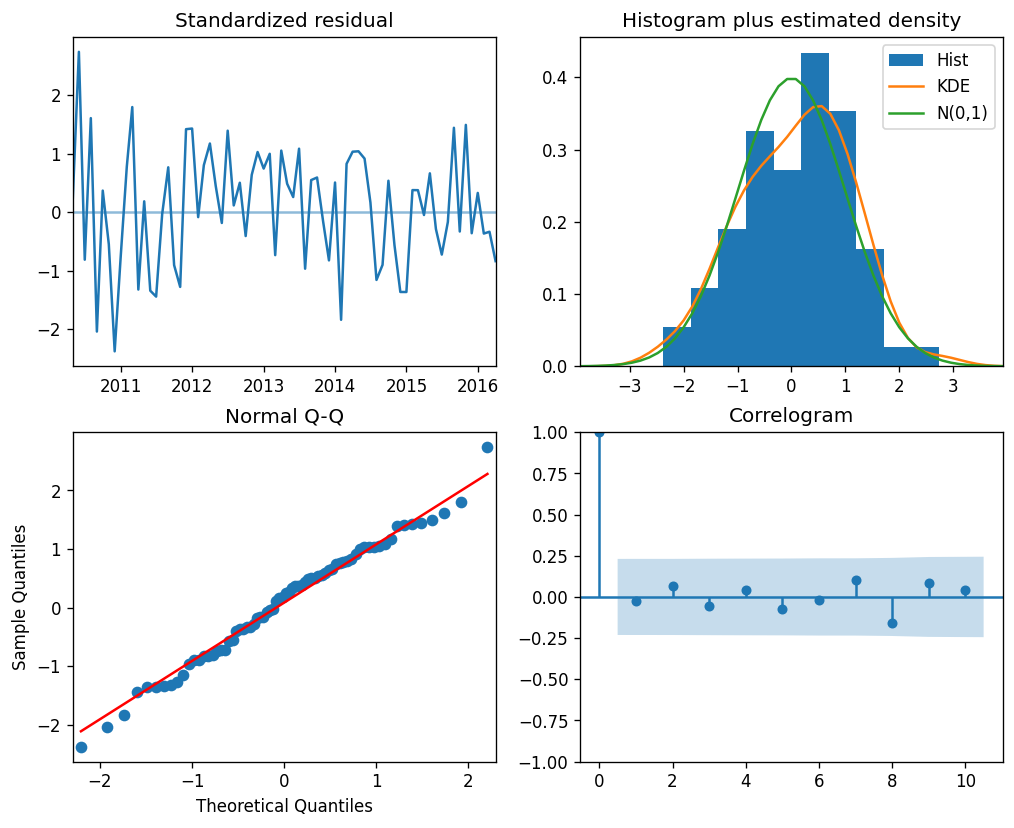

In [46]:
model_diff.plot_diagnostics(figsize=(10,8))
plt.show()

In [49]:
test_diff

time
2016-04-01    2700.0
2016-05-01    2800.0
2016-06-01    4100.0
2016-07-01    5200.0
2016-08-01    6100.0
2016-09-01    4700.0
2016-10-01    3000.0
2016-11-01    2500.0
2016-12-01    2400.0
2017-01-01    4100.0
2017-02-01    4300.0
2017-03-01    3100.0
2017-04-01    2900.0
2017-05-01    4500.0
2017-06-01    3500.0
2017-07-01    3800.0
2017-08-01    4500.0
2017-09-01    3900.0
2017-10-01    3200.0
2017-11-01    4500.0
2017-12-01    5900.0
2018-01-01    5400.0
2018-02-01    4400.0
2018-03-01    4700.0
2018-04-01    4500.0
Name: value, dtype: float64

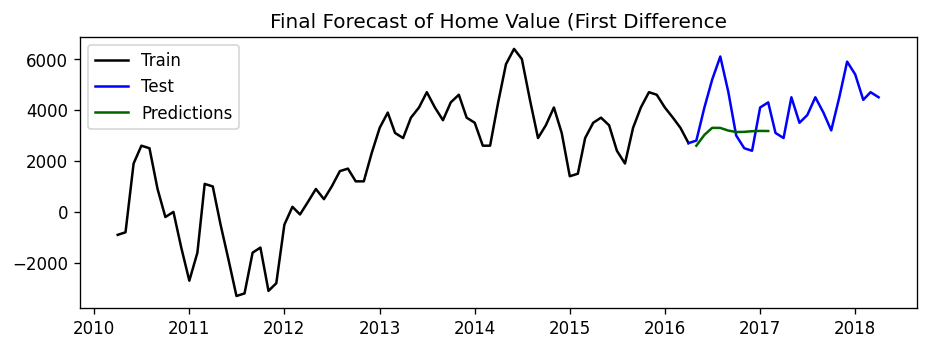

In [52]:
# Forecast
y_pred_diff = model_diff.predict(start = test_diff.index[0], end = test_diff.index[-1])

# Plot
plt.plot(train_diff, color = "black",label='Train')
plt.plot(test_diff, color = "blue",label='Test')
plt.plot(y_pred_diff, color='darkgreen',label='Predictions')

plt.title("Final Forecast of Home Value (First Difference")
plt.legend()
plt.show();